In [1]:
# Import all required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
              'punkt',
              'wordnet',
              'omw-1.4',
              'vader-lexicon'
              ])
%matplotlib inline
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Package 'vader-lexicon' not found in index
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/victorbabalola/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
!pip install text-preprocessing

In [3]:
!pip install wordcloud

In [53]:
# Load in the dataset

tourist_data = pd.read_csv("tourist_accommodation_reviews.csv")
tourist_data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [5]:
# Checkin to see the first 10 rows

tourist_data.head(10)

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...
5,rn572308369,"Reviewed April 9, 2018",Kathu,Thong Dee The Kathu Brasserie,We travel to Phuket every year from Australia ...
6,rn572053040,"Reviewed April 8, 2018",Kathu,Thong Dee The Kathu Brasserie,Had roast beef and lamb plenty of it and very ...
7,rn571915434,"Reviewed April 8, 2018",Kathu,Thong Dee The Kathu Brasserie,This place has a lot to learn when it comes to...
8,rn571792182,"Reviewed April 7, 2018",Kathu,Thong Dee The Kathu Brasserie,This restaurant oozes class as soon as you ent...
9,rn571778672,"Reviewed April 7, 2018",Kathu,Thong Dee The Kathu Brasserie,"Put simply, just one of the best dining experi..."


In [6]:
# Checking to see the last 6 rows

tourist_data.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."
53643,rn161212765,"Reviewed May 19, 2013",Patong,Bite in,The restaurant put in a good location in Jungc...


In [7]:
# checking to the number of columns and rows in our dataset

tourist_data.shape

(53644, 5)

In [8]:
# check to see the structure/summary of our dataset using describe

tourist_data.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [9]:
tourist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [10]:
# checking to see if there are any null data in our dataset

tourist_data.isnull().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [52]:
# Since there are no null data in the dataset, we carry on with work

tourist_data.head()

,serial_number,review_date,location,hotel_restaurant,review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [54]:
# Checking the total number of reviews in our dataset

tourist_data['Review'].nunique()

49938

In [13]:
# renaming the columns to make it better to work with

tourist_data = tourist_data.rename(columns={'ID': 'serial_number', 'Review Date': 'review_date', 'Location':'location', 'Hotel/Restaurant name':
                       'hotel_restaurant', 'Review':'review' })

In [14]:
tourist_data.head()

,serial_number,review_date,location,hotel_restaurant,review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [15]:
# Checking number of restaurants in our data

tourist_data['hotel_restaurant'].nunique()

537

In [16]:
# checking for the number of locations in our data

tourist_data['location'].nunique()

25

<AxesSubplot:>

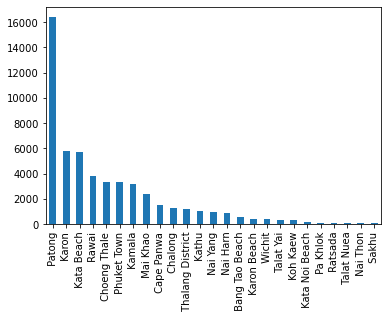

In [17]:
tourist_data['location'].value_counts().plot.bar()

In [18]:
tourist_data[['hotel_restaurant', 'review']] 

,hotel_restaurant,review
0,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...
...,...,...
53639,Bite in,"I love this small restaurant, for the great fo..."
53640,Bite in,We stopped at this restaurant after shopping a...
53641,Bite in,"Great times ,This is one of the best restauran..."
53642,Bite in,"Bite in, it has become my favorite restaurant ..."


In [19]:
# Sorting for the required 30 hotels and restaurants to work with

hotel_30 = [] # Storing the 30 sampled hotels or restaurants 
index_pos = list(np.random.choice(np.arange(0,537), 30)) # generate the index position of each hotel / restaurant
hotel_name = list(tourist_data['hotel_restaurant'].unique()) # Get the unique list of all hotels/restaurants
for a in index_pos:
    hotel_30.append(hotel_name[a])

In [20]:
hotel_30 

['Macarona - European Cuisine & Pizzeria',
 'Mama Restaurant - Karon Beach',
 'Bellini',
 'K-Hotel Restaurant and Beer Garden',
 'Fuji Japanese Restaurant - Jungceylon Patong',
 'Restaurant at Lillo Island Resort',
 'Rum Jungle',
 'Sabai Corner',
 'Dee Plee - Anantara Layan Phuket Resort',
 'Mee Ton Poe',
 'Ying Restaurant',
 'Rock Salt',
 'White Box Phuket',
 'PaPa Restaurant',
 'Highway Curry Indian & Thai Cuisine',
 'No 9 2nd Restaurant',
 'Autogrill Risto Bar Pizza',
 'ELLA Bar & Bistro',
 'The 9th Floor restaurant',
 'Pan Bistro',
 'Two Chefs - Karon Beach',
 'El Gaucho Steakhouse',
 'Odysseus Greek Organic Restaurant',
 'Eightfold Restaurant',
 'The Kitchen',
 'Mando Restaurant & Steakhouse',
 'Malila Restaurant',
 "Louis' Kitchen",
 'Baan Rim Pa Kalim',
 'Food Court at Banzaan Fresh Market']

In [21]:
# Sorting our randomly selected hotels or restaurants based on reviews

hotel_reviews = tourist_data[tourist_data['hotel_restaurant'].isin(hotel_30)]
hotel_reviews

,serial_number,review_date,location,hotel_restaurant,review
100,rn581307988,Reviewed yesterday,Kata Beach,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...
101,rn580977661,Reviewed 2 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...
102,rn580827047,Reviewed 3 days ago,Kata Beach,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...
103,rn580517333,Reviewed 5 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...
104,rn580035619,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...
...,...,...,...,...,...
51586,rn573658599,Reviewed 4 weeks ago,Patong,Malila Restaurant,We were looking for some good seafood restaura...
51587,rn571663585,"Reviewed April 7, 2018",Patong,Malila Restaurant,7 of us ate here for dinner and were excited a...
51588,rn569112244,"Reviewed March 27, 2018",Patong,Malila Restaurant,We had “dinner” at this “restaurant”\r\nTreate...
51589,rn569110121,"Reviewed March 27, 2018",Patong,Malila Restaurant,This place is a total scam. The food is poor a...


In [22]:
hotel_reviews[['hotel_restaurant', 'review']] 

,hotel_restaurant,review
100,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...
101,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...
102,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...
103,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...
104,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...
...,...,...
51586,Malila Restaurant,We were looking for some good seafood restaura...
51587,Malila Restaurant,7 of us ate here for dinner and were excited a...
51588,Malila Restaurant,We had “dinner” at this “restaurant”\r\nTreate...
51589,Malila Restaurant,This place is a total scam. The food is poor a...


## Applying Sentiment Analysis & Texting Mining

In [23]:
# Creating a new compound column in the dataframe with all the compound scores for each review

# Initializing SentimentIntensityAnalyzer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

# Apply lambda function to get compound scores.
function = lambda title: vader.polarity_scores(title)['compound']

hotel_reviews['compound'] = hotel_reviews['review'].apply(function)

#hotel_reviews = hotel_reviews.loc[:, ['review', 'compound']]
hotel_reviews.head(5)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/victorbabalola/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/ty/3yv9pg7d5cxctdfl9p96y3300000gp/T/ipykernel_48514/3109531956.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_reviews['compound'] = hotel_reviews['review'].apply(function)


,serial_number,review_date,location,hotel_restaurant,review,compound
100,rn581307988,Reviewed yesterday,Kata Beach,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...,0.9459
101,rn580977661,Reviewed 2 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...,0.9571
102,rn580827047,Reviewed 3 days ago,Kata Beach,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...,0.9771
103,rn580517333,Reviewed 5 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...,0.9019
104,rn580035619,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...,0.7935


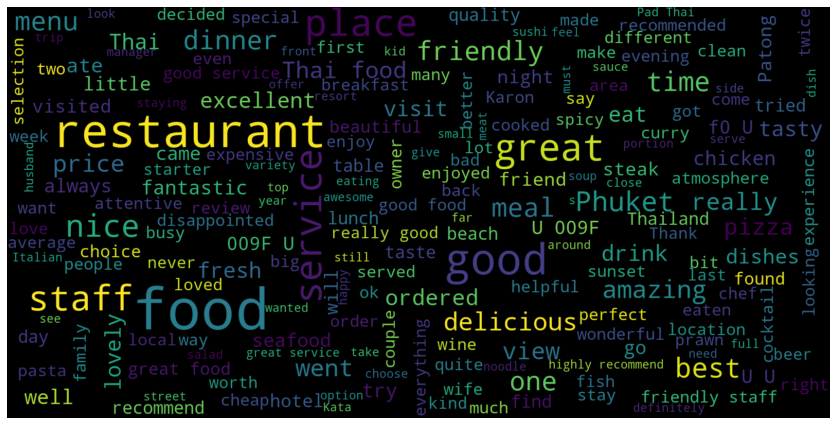

In [24]:
# Now that we've gotten our compound column, we visualise the sentiment to see how it's distributed using word cloud

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

Words = ' '.join([twts for twts in hotel_reviews['review']])
wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110).generate(Words)

plt.figure( figsize=(15,6) )
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')
#plt.imshow(wordcloud)
plt.imshow(wordCloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [25]:
"""
Now that we have done wordcloud on our data and see the most occuring word frequencies, 
we can now first tabulate them, then visualise them.

"""

'\nNow that we have done wordcloud on our data and see the most occuring word frequencies, \nwe can now first tabulate them, then visualise them.\n\n'

In [26]:
from nltk.tokenize import word_tokenize

tokenized_word = word_tokenize(Words)
print(tokenized_word)

['Food', 'was', 'tasty', 'and', 'fresh', '.', 'Fast', 'service', '.', 'The', 'owner', 'was', 'super', 'friendly', 'and', 'the', 'price', 'was', 'great', 'for', '2', '.', 'Highly', 'recommend', 'the', 'souvlaki', '.', 'Great', 'variety', 'of', 'Greek', 'dishes', 'and', 'fantastic', 'service', '.', 'Staff', 'was', 'friendly', 'and', 'helpful', '.', 'I', 'had', 'the', 'souvlaki', ',', 'it', 'was', 'reasonably', 'priced', 'and', 'tasted', 'great', '.', 'We', 'had', 'an', 'excellent', 'culinary', 'experience', 'at', 'this', 'new', 'restaurant', 'in', 'Phuket', '.', 'Moussaka', 'was', 'delicious', ',', 'so', 'was', 'tzatziki', '.', 'Greek', 'hospitality', 'at', 'its', 'best', '.', 'Dimitris', 'was', 'super', 'friendly', ',', 'helpful', 'and', 'loads', 'of', 'fun', '.', 'Amazing', 'service', 'and', 'food', '!', 'Highly', 'recommend', 'if', 'you', 'are', 'looking', 'to', 'get', 'a', 'full', 'Greek', 'experience', '.', 'Freshest', 'ingredients', 'in', 'Thailand', 'and', 'the', 'owner', 'puts', 

In [27]:
# for the tabulation, we first call freqDist from nltk.probability

from nltk.probability import FreqDist

show_freqdist = FreqDist(tokenized_word)
show_freqdist.tabulate(10)

   .  the  and    ,    a  was   to food   is  ... 
6774 4792 4787 3582 2614 2242 2182 1936 1720 1706 


In [28]:
from nltk.probability import FreqDist

show_freqdist = FreqDist(tokenized_word)
print(show_freqdist)

<FreqDist with 7914 samples and 133710 outcomes>


In [29]:
# Checking for the most common words in our data

show_freqdist.most_common(5)

[('.', 6774), ('the', 4792), ('and', 4787), (',', 3582), ('a', 2614)]

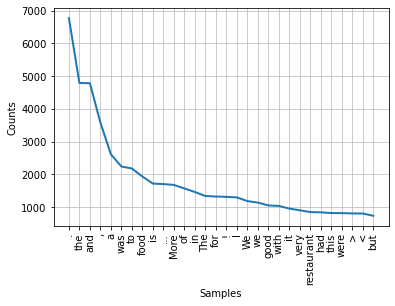

In [30]:
# Visualising our result

show_freqdist.plot(30, cumulative=False)
plt.show()

In [31]:
"""
Words that stood out in the visualisation are; Restaurant, Staff, Food, Friendly, Good, Place, Service and Best

"""

'\nWords that stood out in the visualisation are; Restaurant, Staff, Food, Friendly, Good, Place, Service and Best\n\n'

In [32]:
# Now we identify the the Positive, Negative and Neutral Reviews/setiments based on our compound column

def reviewInsight(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
hotel_reviews['review_rating'] = hotel_reviews['compound'].apply(reviewInsight)    
#hotel_reviews.loc['reviewInsight', 'compound'] = 'sentiment'

hotel_reviews.head(10)

/var/folders/ty/3yv9pg7d5cxctdfl9p96y3300000gp/T/ipykernel_48514/1831626282.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_reviews['review_rating'] = hotel_reviews['compound'].apply(reviewInsight)


,serial_number,review_date,location,hotel_restaurant,review,compound,review_rating
100,rn581307988,Reviewed yesterday,Kata Beach,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...,0.9459,Positive
101,rn580977661,Reviewed 2 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...,0.9571,Positive
102,rn580827047,Reviewed 3 days ago,Kata Beach,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...,0.9771,Positive
103,rn580517333,Reviewed 5 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...,0.9019,Positive
104,rn580035619,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...,0.7935,Positive
105,rn579558058,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,Had possibly the best meal we have had in Kata...,0.9626,Positive
106,rn579313092,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,We thoroughly enjoyed our experience at this r...,0.8805,Positive
107,rn579253569,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,The food is great! Loved the pork gyros so muc...,0.9117,Positive
108,rn579219251,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,Food was really good and had very clean premis...,0.9181,Positive
109,rn579028607,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,"A lovely little restaurant! Food was lovely, s...",0.9257,Positive


In [33]:
# Checking the number of Positive, Negative and Neutral reviews that are there in our data

hotel_reviews['review_rating'].value_counts()

Positive    2685
Negative     249
Neutral       47
Name: review_rating, dtype: int64

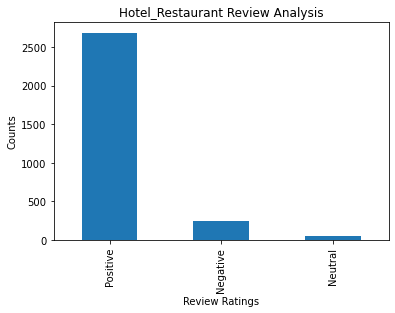

In [34]:
# As we can see, we have more positive reviews. So now, we visualise the counts for more insight, because why not?

plt.title('Hotel_Restaurant Review Analysis')
plt.xlabel('Review Ratings')
plt.ylabel('Counts')
hotel_reviews['review_rating'].value_counts().plot(kind = 'bar')
plt.show()

Text(0.5, 1.0, 'Hotel Review Ratings')

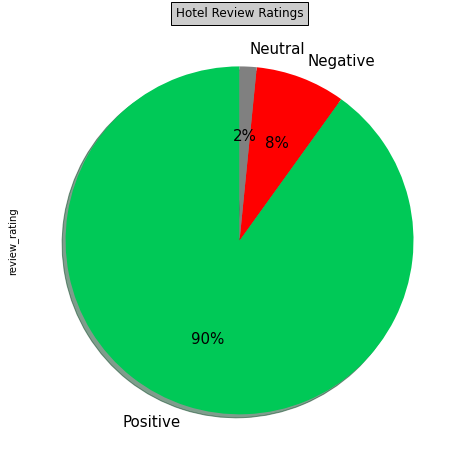

In [35]:
# Now we visualise the distribution of ratings across all the reviews

hotel_reviews.review_rating.value_counts().plot(kind='pie', #autopct='%1.0f%%',  
                                                fontsize=15, figsize=(15,8), colors=["#00C957", "red", "gray"], 
                                                autopct='%1.0f%%', shadow=True, startangle=90)

plt.title("Hotel Review Ratings", size=12, bbox={'facecolor':'0.8', 'pad':5})

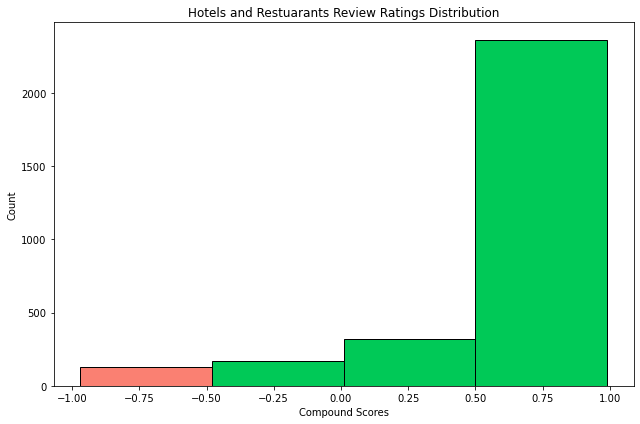

In [36]:
# Now we visualise our rating based on the compound scores

plt.figure(figsize=(9, 6))
#sns.histplot(hotel_reviews, x='compound', color="green", bins=10, binrange=(-1, 1))

ax = sns.histplot(hotel_reviews, x='compound', bins=4, color='#00C957', alpha=1)
ax.patches[0].set_facecolor('salmon')

plt.title("Hotels and Restuarants Review Ratings Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("Count")
plt.tight_layout()

In [55]:
"""

 Based on our analysis, we gathered reviews from 30 random hotel and restaurants, discovering that 
 there were by far more positive reviews from the reviews gathered, and more negative reviews than neutral views.
 This means that over 90% of hotels/restaurants collected are pretty safe for customers. And because the
 random function was called on 30 hotels, the results may vary when refreshed.

"""

'\n\n Based on our analysis, we gathered reviews from 30 random hotel and restaurants, discovering that \n there were by far more positive reviews from the reviews gathered, and more negative reviews than neutral views.\n This means that over 90% of hotels/restaurants collected are pretty safe for customers. And because the\n random function was called on 30 hotels, the results may vary when refreshed.\n\n'

In [38]:
hotel_reviews.head()

,serial_number,review_date,location,hotel_restaurant,review,compound,review_rating
100,rn581307988,Reviewed yesterday,Kata Beach,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...,0.9459,Positive
101,rn580977661,Reviewed 2 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...,0.9571,Positive
102,rn580827047,Reviewed 3 days ago,Kata Beach,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...,0.9771,Positive
103,rn580517333,Reviewed 5 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...,0.9019,Positive
104,rn580035619,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...,0.7935,Positive


In [39]:
# Checking for negative reviews per hotel/restaurant

(hotel_reviews['compound']<0).groupby(hotel_reviews['hotel_restaurant']).sum()

hotel_restaurant
Autogrill Risto Bar Pizza                        8
Baan Rim Pa Kalim                                4
Bellini                                         11
Dee Plee - Anantara Layan Phuket Resort          2
ELLA Bar & Bistro                                4
Eightfold Restaurant                             5
El Gaucho Steakhouse                            11
Food Court at Banzaan Fresh Market              10
Fuji Japanese Restaurant - Jungceylon Patong    25
Highway Curry Indian & Thai Cuisine              1
K-Hotel Restaurant and Beer Garden               4
Louis' Kitchen                                   6
Macarona - European Cuisine & Pizzeria           9
Malila Restaurant                               21
Mama Restaurant - Karon Beach                   35
Mando Restaurant & Steakhouse                    2
Mee Ton Poe                                      7
No 9 2nd Restaurant                             11
Odysseus Greek Organic Restaurant                2
PaPa Restauran

In [40]:
# Now we check for the percentage of negative reviews

percent_negative = pd.DataFrame((hotel_reviews['compound']<0).groupby(hotel_reviews['hotel_restaurant']).sum()
                               /hotel_reviews['hotel_restaurant'].groupby(hotel_reviews['hotel_restaurant']).count()
                               *100, columns=['% of negative reviews']).sort_values(by='% of negative reviews')
percent_negative

,% of negative reviews
hotel_restaurant,
Highway Curry Indian & Thai Cuisine,1.000000
Rock Salt,1.000000
Mando Restaurant & Steakhouse,2.000000
Odysseus Greek Organic Restaurant,2.000000
Dee Plee - Anantara Layan Phuket Resort,2.150538
Sabai Corner,3.000000
ELLA Bar & Bistro,4.000000
K-Hotel Restaurant and Beer Garden,4.000000
Two Chefs - Karon Beach,4.000000


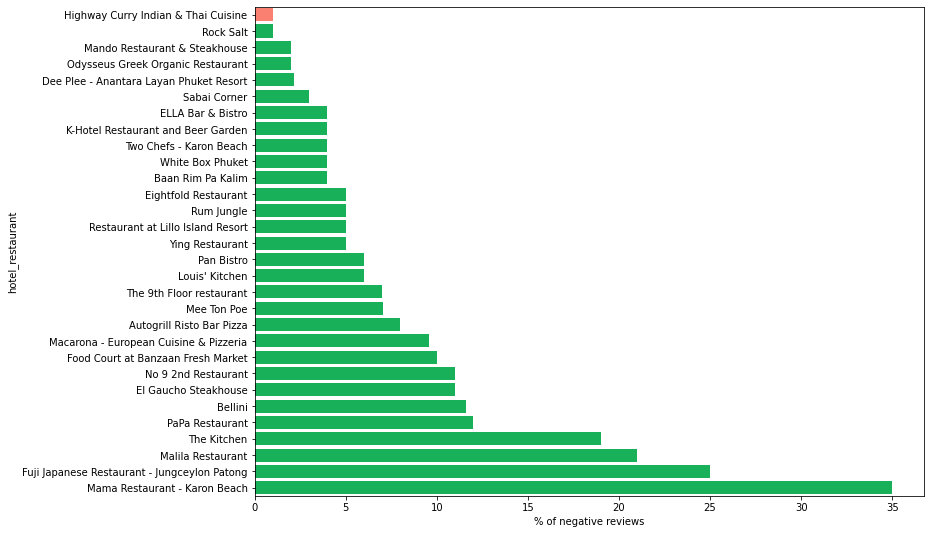

In [41]:
# Visualising the percentage reviews for more insight using seaborn plot

plt.figure(figsize=(12, 9))
ax = sns.barplot(data=percent_negative, x='% of negative reviews', y=percent_negative.index,
                 color='#00C957', alpha=1)
ax.patches[0].set_facecolor('salmon')

In [42]:
# Checking for positive reviews per hotel/restaurant

(hotel_reviews['compound']>0).groupby(hotel_reviews['hotel_restaurant']).sum()

hotel_restaurant
Autogrill Risto Bar Pizza                       90
Baan Rim Pa Kalim                               96
Bellini                                         81
Dee Plee - Anantara Layan Phuket Resort         91
ELLA Bar & Bistro                               92
Eightfold Restaurant                            95
El Gaucho Steakhouse                            88
Food Court at Banzaan Fresh Market              82
Fuji Japanese Restaurant - Jungceylon Patong    74
Highway Curry Indian & Thai Cuisine             97
K-Hotel Restaurant and Beer Garden              94
Louis' Kitchen                                  90
Macarona - European Cuisine & Pizzeria          84
Malila Restaurant                               77
Mama Restaurant - Karon Beach                   63
Mando Restaurant & Steakhouse                   97
Mee Ton Poe                                     89
No 9 2nd Restaurant                             88
Odysseus Greek Organic Restaurant               98
PaPa Restauran

In [43]:
# Checking for the percentage of positive reviews

percent_positive = pd.DataFrame((hotel_reviews['compound']>0).groupby(hotel_reviews['hotel_restaurant']).sum()
                               /hotel_reviews['hotel_restaurant'].groupby(hotel_reviews['hotel_restaurant']).count()
                               *100, columns=['% of positive reviews']).sort_values(by='% of positive reviews')
percent_positive

,% of positive reviews
hotel_restaurant,
Mama Restaurant - Karon Beach,63.000000
Fuji Japanese Restaurant - Jungceylon Patong,74.000000
Malila Restaurant,77.000000
The Kitchen,79.000000
Food Court at Banzaan Fresh Market,82.000000
Bellini,85.263158
PaPa Restaurant,87.000000
No 9 2nd Restaurant,88.000000
El Gaucho Steakhouse,88.000000


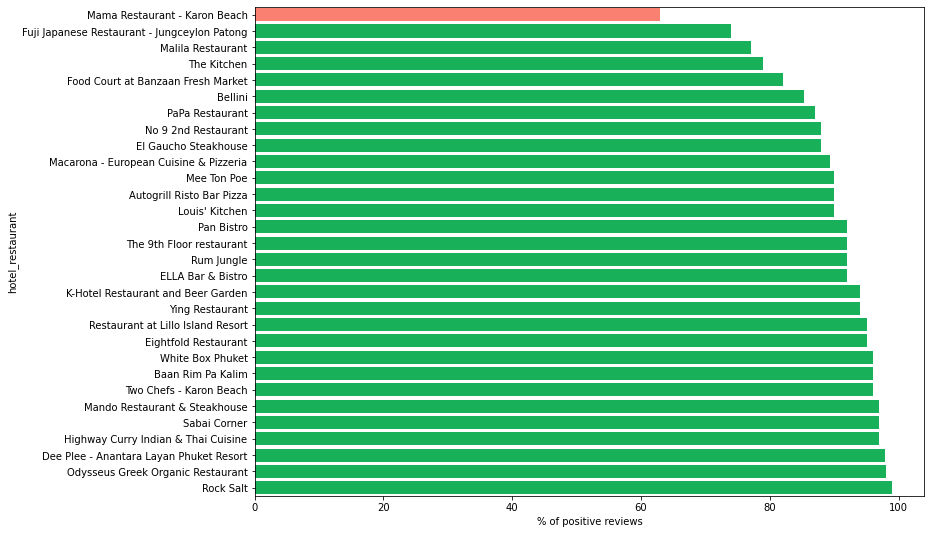

In [44]:
# Visualising the percentage reviews for more insight using seaborn plot

plt.figure(figsize=(12, 9))
ax = sns.barplot(data=percent_positive, x='% of positive reviews', y=percent_positive.index,
                 color='#00C957', alpha=1)
ax.patches[0].set_facecolor('salmon')

In [45]:
# Checking for neutral reviews per hotel/resturant

(hotel_reviews['compound']==0).groupby(hotel_reviews['hotel_restaurant']).sum()

hotel_restaurant
Autogrill Risto Bar Pizza                       2
Baan Rim Pa Kalim                               0
Bellini                                         3
Dee Plee - Anantara Layan Phuket Resort         0
ELLA Bar & Bistro                               4
Eightfold Restaurant                            0
El Gaucho Steakhouse                            1
Food Court at Banzaan Fresh Market              8
Fuji Japanese Restaurant - Jungceylon Patong    1
Highway Curry Indian & Thai Cuisine             2
K-Hotel Restaurant and Beer Garden              2
Louis' Kitchen                                  4
Macarona - European Cuisine & Pizzeria          1
Malila Restaurant                               2
Mama Restaurant - Karon Beach                   2
Mando Restaurant & Steakhouse                   1
Mee Ton Poe                                     3
No 9 2nd Restaurant                             1
Odysseus Greek Organic Restaurant               0
PaPa Restaurant                  

In [46]:
# Checking for the percentage of neutral reviews

percent_neutral = pd.DataFrame((hotel_reviews['compound']==0).groupby(hotel_reviews['hotel_restaurant']).sum()
                               /hotel_reviews['hotel_restaurant'].groupby(hotel_reviews['hotel_restaurant']).count()
                               *100, columns=['% of neutral reviews']).sort_values(by='% of neutral reviews')
percent_neutral

,% of neutral reviews
hotel_restaurant,
Sabai Corner,0.000000
White Box Phuket,0.000000
Restaurant at Lillo Island Resort,0.000000
Rock Salt,0.000000
Eightfold Restaurant,0.000000
Odysseus Greek Organic Restaurant,0.000000
Dee Plee - Anantara Layan Phuket Resort,0.000000
Two Chefs - Karon Beach,0.000000
Baan Rim Pa Kalim,0.000000


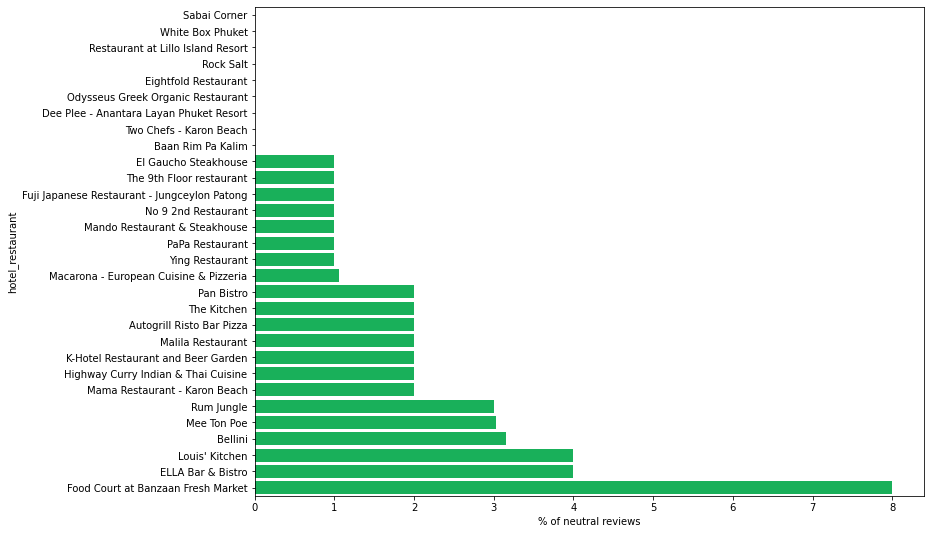

In [47]:
# Visualising the percentage reviews for more insight using seaborn plot

plt.figure(figsize=(12, 9))
ax = sns.barplot(data=percent_neutral, x='% of neutral reviews', y=percent_neutral.index,
                 color='#00C957', alpha=1)
ax.patches[0].set_facecolor('salmon')